In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [5]:
fake = pd.read_csv("fake.csv")
true = pd.read_csv("true.csv")
fake.count('columns')   

0        4
1        4
2        4
3        4
4        4
        ..
23476    4
23477    4
23478    4
23479    4
23480    4
Length: 23481, dtype: int64

In [4]:
fake['category']=1
true['category']=0

df=pd.concat([fake,true]).reset_index(drop=True)
df.head()


,-title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


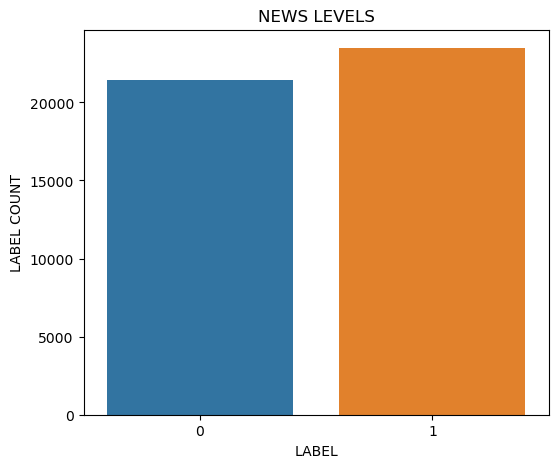

In [5]:
plt.figure(figsize=(6, 5))
sns.countplot(x='category', data=df)

# Add title and labels for clarity
plt.title('NEWS LEVELS')
plt.xlabel('LABEL')
plt.ylabel('LABEL COUNT')
plt.xticks([0, 1])  # Ensuring only 0 and 1 are shown on the x-axis

# Show the plot
plt.show()

In [6]:
# Separate the majority and minority classes
df_majority = df[df['category'] == 1]
df_minority = df[df['category'] == 0]

# Sample 3000 data points from each class
df_majority_sampled = df_majority.sample(n=3000, random_state=42)
df_minority_sampled = df_minority.sample(n=3000, random_state=42)

# Combine the sampled data
df_balanced = pd.concat([df_majority_sampled, df_minority_sampled])

# Shuffle the dataframe
df= df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset if needed
# df_balanced.to_csv('balanced_dataset.csv', index=False)

In [7]:
df_majority = df[df['category'] == 1]
df_minority = df[df['category'] == 0]

# Undersample the majority class
df_majority_undersampled = df_majority.sample(len(df_minority), random_state=42)

# Combine the undersampled majority class with the minority class
df = pd.concat([df_majority_undersampled, df_minority])

In [8]:
df=df[['text','category']]

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

TF IDF VECTORISATION


In [10]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

COUNTVECT

In [11]:
# Count Vectorization
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

WORD2VEC

In [12]:
# Word2Vec Vectorization
w2v_model = Word2Vec(sentences=X_train.str.split(), vector_size=100, window=5, min_count=1, workers=4)
# Function to average Word2Vec vectors
def document_vector(tokens, model):
    vec = np.zeros(model.vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count > 0:
        vec /= count
    return vec

# Create feature vectors for train and test data
X_train_w2v = np.array([document_vector(tokens, w2v_model) for tokens in X_train])
X_test_W2V = np.array([document_vector(tokens, w2v_model) for tokens in X_test])

In [13]:

# Train Logistic Regression Models
log_reg_tfidf = LogisticRegression()
log_reg_count = LogisticRegression()
log_reg_w2v = LogisticRegression()

log_reg_tfidf.fit(X_train_tfidf, y_train)
log_reg_count.fit(X_train_count, y_train)
log_reg_w2v.fit(X_train_w2v, y_train)

/home/sreevishak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Make Predictions and Evaluate
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)
y_pred_count = log_reg_count.predict(X_test_count)
y_pred_w2v = log_reg_w2v.predict(X_test_W2V)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
accuracy_count = accuracy_score(y_test, y_pred_count)
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)

report_tfidf = classification_report(y_test, y_pred_tfidf)
report_count = classification_report(y_test, y_pred_count)
report_w2v = classification_report(y_test, y_pred_w2v)

print(f'TF-IDF Accuracy: {accuracy_tfidf}')
print('TF-IDF Classification Report:')
print(report_tfidf)

print(f'Count Vectorization Accuracy: {accuracy_count}')
print('Count Vectorization Classification Report:')
print(report_count)

print(f'Word2Vec Accuracy: {accuracy_w2v}')
print('Word2Vec Classification Report:')
print(report_w2v)

TF-IDF Accuracy: 0.9691666666666666
TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       587
           1       0.98      0.96      0.97       613

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

Count Vectorization Accuracy: 0.985
Count Vectorization Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       587
           1       0.99      0.98      0.99       613

    accuracy                           0.98      1200
   macro avg       0.98      0.99      0.98      1200
weighted avg       0.99      0.98      0.99      1200

Word2Vec Accuracy: 0.7191666666666666
Word2Vec Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       587
           1       0.7